# Data Preprocessing

### Import Dataset

In [1]:
import gdown
import os
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# If using google colab: Download Data
# !gdown 1XbC3fjc99S9n4Sdg_t7FOa4qwi0zBPlH
# data = pd.read_csv('/content/song_data.csv')

# If using Jupyter notebook on local repository:
gdown.download('https://drive.google.com/uc?id=1XbC3fjc99S9n4Sdg_t7FOa4qwi0zBPlH', 'Dataset/song_data.csv')
data = pd.read_csv('Dataset/song_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1XbC3fjc99S9n4Sdg_t7FOa4qwi0zBPlH
To: c:\Users\new user\OneDrive\Learning Progress Review\Data Science\Final-Project-DS40\Dataset\song_data.csv
100%|██████████| 2.22M/2.22M [00:06<00:00, 341kB/s] 


In [3]:
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 1. Basic Information

In [4]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
data.shape

(18835, 15)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


### 2. Check Unique Value

In [8]:
data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

### 3. Check Missing Value

In [9]:
data.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### 4. Check Duplicate Value

In [10]:
df_temp = data.copy()

In [11]:
df_temp

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [12]:
df_temp[(df_temp.duplicated())]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [13]:
df_temp[(df_temp['song_name'] == 'Hotel California - Remastered')]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
353,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
2140,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
7767,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609


In [14]:
df_temp.drop_duplicates(keep='first',inplace=True)

In [15]:
df_temp

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


### 5. Check Outliers

In [16]:
df_temp.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [17]:
df_temp.drop(['song_name'], axis=1, inplace=True)

In [18]:
categorical_cols = []
numerical_cols = []
for col in df_temp.columns:
    if df_temp[col].nunique() <= 15:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

Categorical Columns: ['key', 'audio_mode', 'time_signature']
Numerical Columns: ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


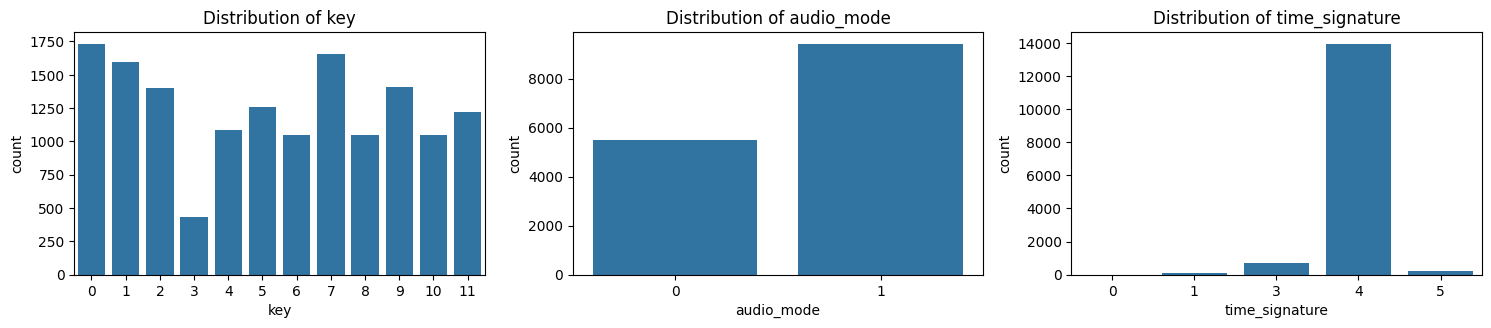

In [19]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_cols):
    plt.subplot(6, 4, i + 1)
    sns.countplot(data=df_temp, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

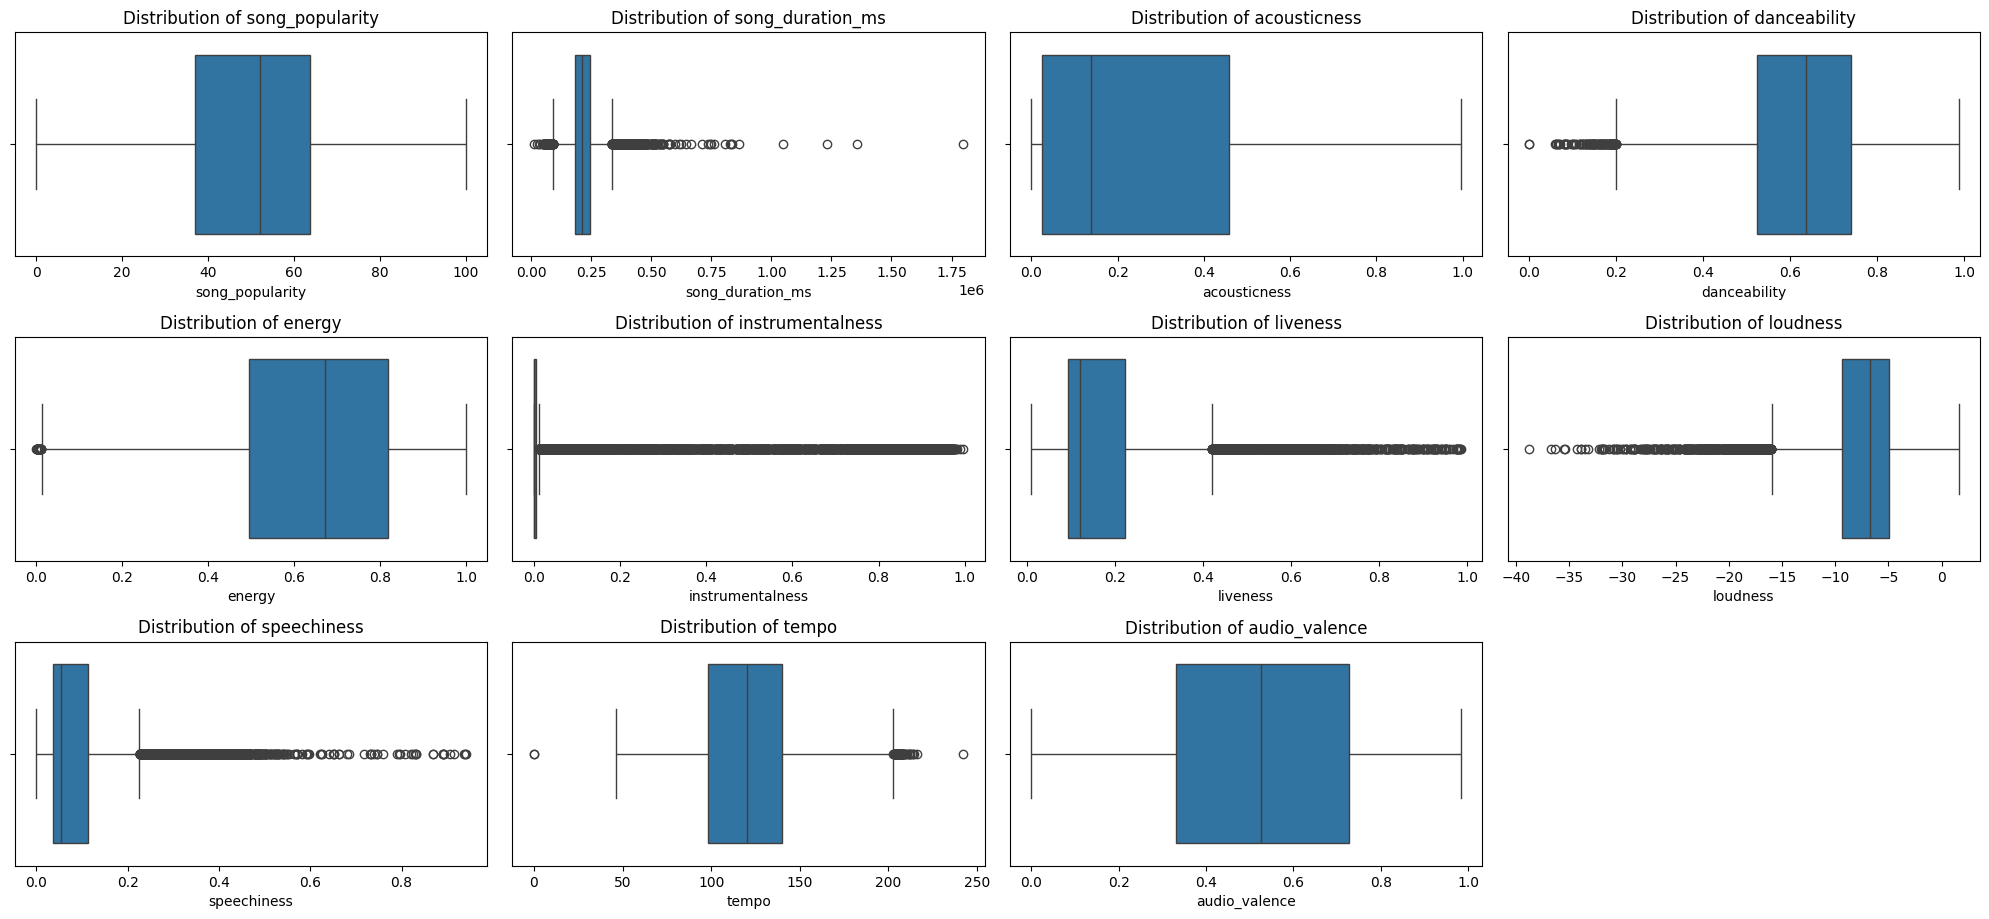

In [20]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df_temp, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [21]:
def remove_outliers(df, cols):
    for col in cols:
        # Menghitung Q1 dan Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Kolom yang ingin dibersihkan dari outlier
cols_to_clean = numerical_cols

# Menghapus outlier pada kolom tertentu
df_cleaned = remove_outliers(df_temp, cols_to_clean)

df_cleaned.shape

(8930, 14)

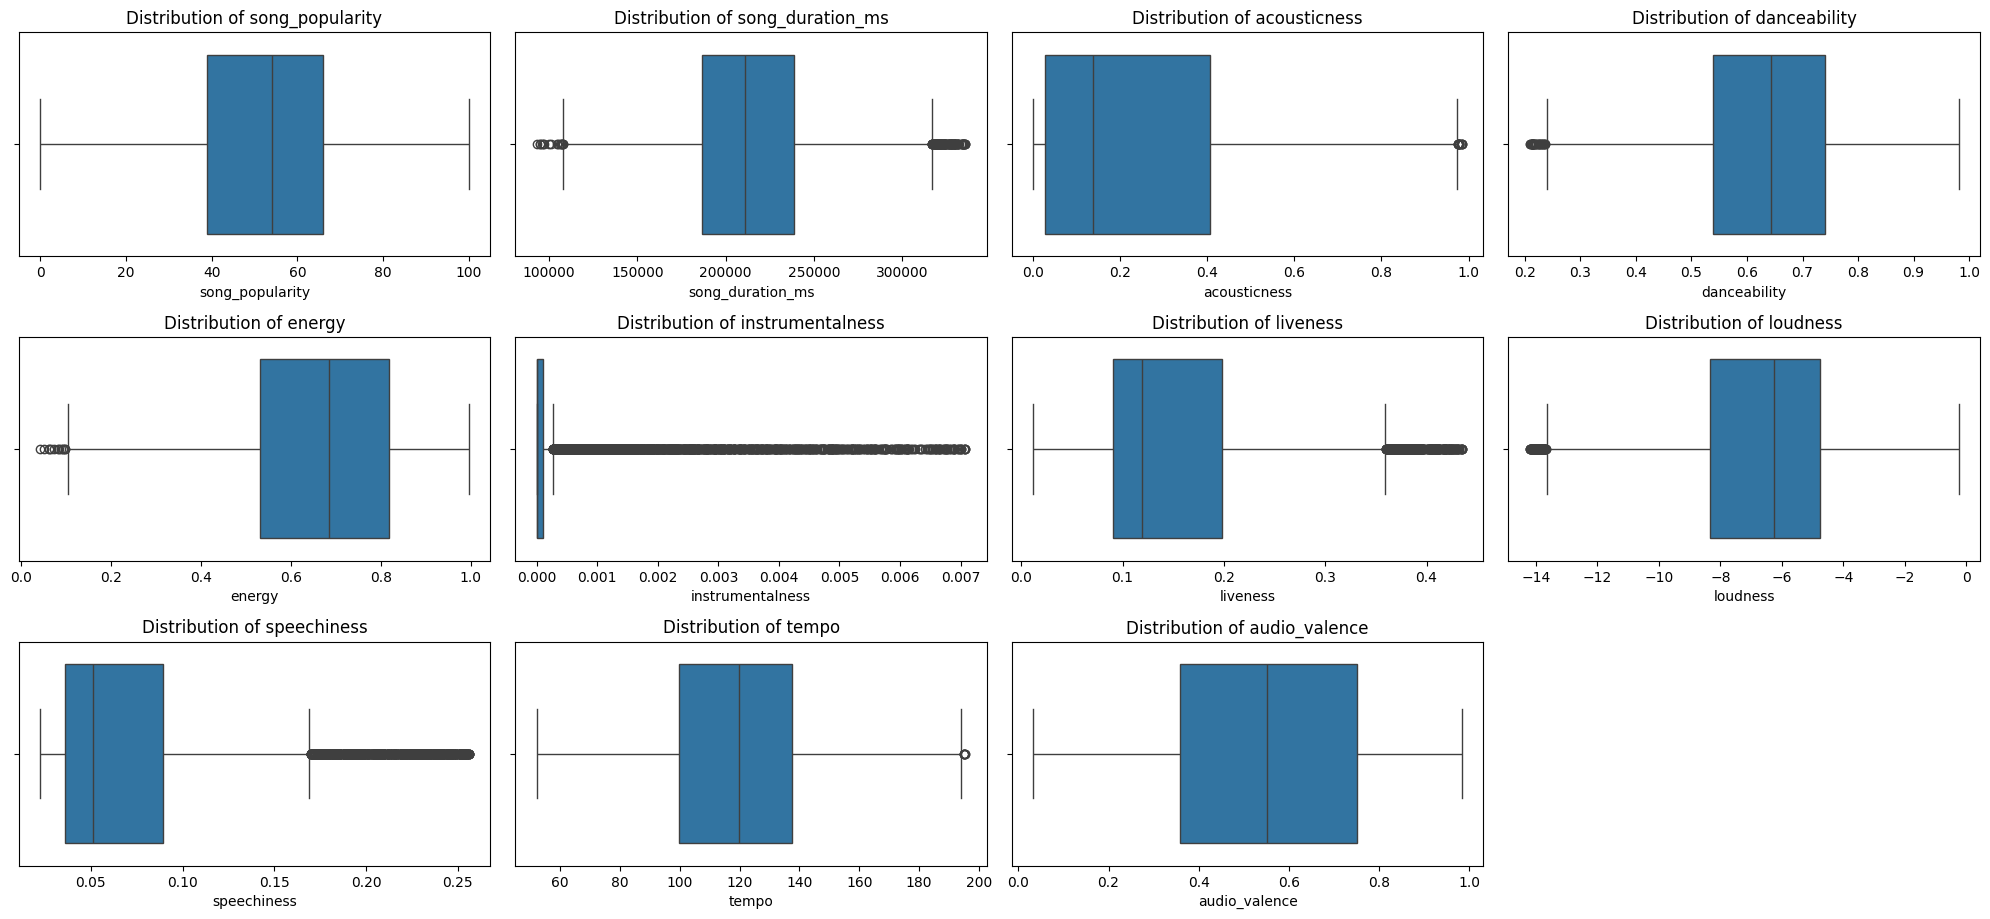

In [22]:
plt.figure(figsize=(20, 18))

columns = numerical_cols

for i, col in enumerate(columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [23]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,8930.0,50.445577,20.698054,0.000000,39.000000,54.000000,66.000000,100.00000
song_duration_ms,8930.0,213986.194737,41521.872725,93043.000000,186323.250000,211162.500000,238502.750000,335693.00000
acousticness,8930.0,0.247900,0.268978,0.000003,0.027125,0.137000,0.406000,0.98500
danceability,8930.0,0.634088,0.146220,0.209000,0.539000,0.643000,0.740000,0.98100
energy,8930.0,0.662503,0.194128,0.042700,0.531000,0.686000,0.818000,0.99600
instrumentalness,8930.0,0.000392,0.001086,0.000000,0.000000,0.000002,0.000109,0.00708
key,8930.0,5.320829,3.577531,0.000000,2.000000,6.000000,8.000000,11.00000
liveness,8930.0,0.154198,0.092407,0.011900,0.090500,0.119000,0.198000,0.43500
loudness,8930.0,-6.747304,2.688613,-14.197000,-8.328250,-6.251500,-4.764750,-0.25700
audio_mode,8930.0,0.646473,0.478091,0.000000,0.000000,1.000000,1.000000,1.00000


### 6. Split Dataset

In [24]:
target = df_cleaned["song_popularity"]
df_tmp = df_cleaned.drop(columns="song_popularity")

In [25]:
#80% Training and 20% Test
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [26]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (7144, 13)
Dimensi y_train dataset:  (7144,)
Dimensi X_test dataset:  (1786, 13)
Dimensi y_test dataset:  (1786,)


### 7. Scaling

In [27]:
scaler = RobustScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(scaler.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [28]:
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2340,-0.115291,-0.057902,-0.562189,0.200000,-0.011261,-0.500000,-0.422719,0.165815,0.0,-0.456189,-0.514625,0.0,-0.237245
11980,0.117094,0.736939,-0.597015,-0.877193,-0.022342,-0.333333,-0.093110,-0.482334,0.0,-0.357904,0.194790,0.0,-0.959184
16317,-1.704629,-0.305567,0.089552,0.112281,0.055946,0.166667,1.461825,0.183726,0.0,0.148354,0.519506,0.0,-0.655612
14155,-0.664818,-0.344940,-0.522388,1.045614,2.824505,-0.166667,1.871508,0.722172,0.0,0.569309,0.336038,0.0,-0.489796
12999,0.427800,0.481642,0.238806,-0.221053,0.230811,0.333333,-0.284916,0.747359,0.0,0.159481,-1.370530,-1.0,-0.130102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,1.206107,0.110541,0.412935,0.540351,-0.001081,-0.166667,-0.065177,-0.786259,0.0,-0.294854,0.298105,0.0,0.505102
16001,0.925120,-0.357521,-1.189055,0.589474,-0.022342,-0.666667,0.102421,0.185405,0.0,-0.272601,1.404538,0.0,-0.165816
9199,1.649397,-0.283985,0.567164,0.340351,19.437117,0.666667,1.899441,-0.543903,-1.0,2.143718,-0.666615,0.0,0.747449
5649,-0.395735,0.489538,0.373134,-0.543860,7.878559,-1.000000,0.018622,-0.383265,0.0,0.090867,1.473716,0.0,0.696429


In [29]:
X_train.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7.144000e+03,7144.000000,7144.000000,7.144000e+03,7144.000000,7144.000000
mean,0.051739,0.292373,-0.044905,-0.079342,3.551033,-0.108389,0.330171,-1.412143e-01,-0.355543,0.423118,1.189156e-02,-0.038914,0.004078
std,0.799547,0.710956,0.724476,0.680889,9.840395,0.596781,0.860457,7.537031e-01,0.478711,1.017808,7.042514e-01,0.266466,0.617151
min,-2.290370,-0.363196,-2.154229,-2.250175,-0.022342,-1.000000,-0.997207,-2.223046e+00,-1.000000,-0.530366,-1.749524e+00,-3.000000,-1.313520
25%,-0.477008,-0.292012,-0.517413,-0.533333,-0.022342,-0.666667,-0.264432,-5.848317e-01,-1.000000,-0.278628,-5.325006e-01,0.000000,-0.489796
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.243038e-16,0.000000,0.000000,-1.834809e-16,0.000000,0.000000
75%,0.522992,0.707988,0.482587,0.466667,0.977658,0.333333,0.735568,4.151683e-01,0.000000,0.721372,4.674994e-01,0.000000,0.510204
max,2.406766,2.229241,1.686567,1.094737,63.761441,0.833333,2.942272,1.678164e+00,0.000000,3.794159,1.951067e+00,1.000000,1.112245


In [30]:
X_test

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4272,-0.934154,-0.357679,-0.189055,0.224561,-0.022342,0.333333,-0.335196,0.254810,0.0,0.621233,0.006314,0.0,-0.071429
12907,-0.009305,-0.356021,-0.960199,1.007018,-0.022342,0.666667,0.204842,0.725810,0.0,-0.070468,0.622252,0.0,-0.341837
8240,-1.314128,0.326359,0.094527,-0.445614,-0.022342,-0.333333,-0.589385,-0.557056,0.0,-0.044506,0.142319,0.0,1.043367
548,1.412107,-0.360284,-0.835821,1.028070,26.824505,0.166667,0.763501,0.675715,-1.0,2.310617,-0.786017,0.0,-0.795918
5161,-1.151805,0.610607,-0.238806,-0.715789,0.792072,0.166667,1.964618,-1.616596,0.0,-0.302272,-0.742481,0.0,0.640306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1.160859,0.336886,0.835821,-0.792982,-0.022342,-0.333333,0.512104,-0.347443,-1.0,0.993973,0.132094,0.0,-0.140306
1771,-0.551078,0.523753,0.164179,0.210526,-0.022342,-0.666667,-0.409683,0.130274,0.0,-0.092721,-0.668939,0.0,-0.002551
9375,0.113992,-0.151336,0.621891,0.873684,0.503784,-0.166667,-0.346369,-0.620304,-1.0,2.718591,-0.889410,0.0,0.637755
8365,0.532739,-0.116331,0.164179,0.578947,-0.022342,-1.000000,0.018622,0.675156,0.0,0.298563,-0.511862,0.0,0.339286


### 8. Save clean data into pickle

In [31]:
# Local
import os
directory = "CleanDataset"

if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

pkl.dump(X_train, open(f'{directory}/X_train.pkl', 'wb'))
pkl.dump(X_test, open(f'{directory}/X_test.pkl', 'wb'))
pkl.dump(y_train, open(f'{directory}/y_train.pkl', 'wb'))
pkl.dump(y_test, open(f'{directory}/y_test.pkl', 'wb'))
pkl.dump(scaler, open(f'{directory}/scaler.pkl', 'wb'))
print("Clean Data Saved!")

Directory already exists!
Clean Data Saved!


In [32]:
# Save on google collab

# from google.colab import drive
# drive.mount('/content/drive')

# # Create a directory in Google Drive
# directory = "/content/drive/My Drive/CleanDataset"

# if not os.path.exists(directory):
#     os.makedirs(directory)
#     print("Directory created successfully!")
# else:
#     print("Directory already exists!")

# pkl.dump(X_train, open(f'{directory}/X_train.pkl', 'wb'))
# pkl.dump(X_test, open(f'{directory}/X_test.pkl', 'wb'))
# pkl.dump(y_train, open(f'{directory}/y_train.pkl', 'wb'))
# pkl.dump(y_test, open(f'{directory}/y_test.pkl', 'wb'))
# pkl.dump(scaler, open(f'{directory}/scaler.pkl', 'wb'))
# print("Clean Data Saved!")